# Day 2 – Exploratory Data Analysis & Data Quality Checks

**Objective:**  
Assess data quality, identify missing values, detect anomalies, and explore data distributions before modeling or advanced analysis.

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    "order_id": [1, 2, 3, 4, 5, 6],
    "customer_id": [101, 102, 101, 103, 104, 102],
    "country": ["USA", "India", "USA", "India", "USA", "India"],
    "amount": [200, 150, 300, 400, 100, 250],
    "order_date": [ "2024-01-01", "2024-01-02", "2024-01-03", "2024-01-04", "2024-01-05", "2024-01-06"]
}

df = pd.DataFrame(data)
df

,order_id,customer_id,country,amount,order_date
0,1,101,USA,200,2024-01-01
1,2,102,India,150,2024-01-02
2,3,101,USA,300,2024-01-03
3,4,103,India,400,2024-01-04
4,5,104,USA,100,2024-01-05
5,6,102,India,250,2024-01-06


In [181]:
df.isnull().sum()

order_id       0
customer_id    0
country        0
amount         0
order_date     0
dtype: int64

In [182]:
df.dtypes

order_id        int64
customer_id     int64
country        object
amount          int64
order_date     object
dtype: object

In [183]:
df.duplicated().sum()

np.int64(0)

In [184]:
df.describe()

,order_id,customer_id,amount
count,6.000000,6.000000,6.000000
mean,3.500000,102.166667,233.333333
std,1.870829,1.169045,108.012345
min,1.000000,101.000000,100.000000
25%,2.250000,101.250000,162.500000
50%,3.500000,102.000000,225.000000
75%,4.750000,102.750000,287.500000
max,6.000000,104.000000,400.000000


In [ ]:
#converting country column to categorical type

df['country'] = df['country'].astype('category')
df.dtypes

order_id          int64
customer_id       int64
country        category
amount            int64
order_date       object
dtype: object

## order_date should not be stored as an object because it represents temporal data. Keeping it as a string prevents time-based operations like sorting, grouping, and date arithmetic. Converting it to datetime allows pandas to treat it as a time-aware variable.

In [186]:
df["order_date"] = pd.to_datetime(df["order_date"])
df.dtypes

order_id                int64
customer_id             int64
country              category
amount                  int64
order_date     datetime64[ns]
dtype: object

*I use .astype() for direct, safe type conversions and pd.to_*() functions when parsing or interpreting raw data such as dates or numeric strings.*

In [ ]:
df["amount"].value_counts()

amount
200    1
150    1
300    1
400    1
100    1
250    1
Name: count, dtype: int64

In [188]:
df["amount"].describe()

count      6.000000
mean     233.333333
std      108.012345
min      100.000000
25%      162.500000
50%      225.000000
75%      287.500000
max      400.000000
Name: amount, dtype: float64

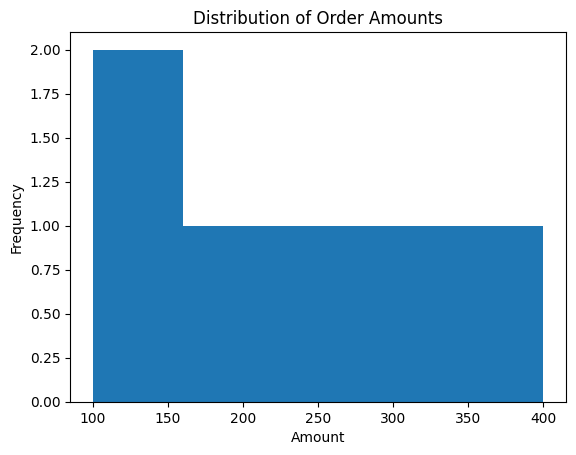

In [189]:
plt.hist(df["amount"], bins=5)
plt.title("Distribution of Order Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

#It just show ranges of amounts not actual values

In [190]:
#Manually Define Bins & Label Them

bins = [0, 150, 250, 350, float("inf")]
labels = ["Low", "Medium", "High", "Premium"]

df["amount_bucket"] = pd.cut(
    df["amount"],
    bins=bins,
    labels=labels,
    right=True
)

df


,order_id,customer_id,country,amount,order_date,amount_bucket
0,1,101,USA,200,2024-01-01,Medium
1,2,102,India,150,2024-01-02,Low
2,3,101,USA,300,2024-01-03,High
3,4,103,India,400,2024-01-04,Premium
4,5,104,USA,100,2024-01-05,Low
5,6,102,India,250,2024-01-06,Medium


In [191]:
df["amount_bucket"].value_counts().sort_index()


amount_bucket
Low        2
Medium     2
High       1
Premium    1
Name: count, dtype: int64

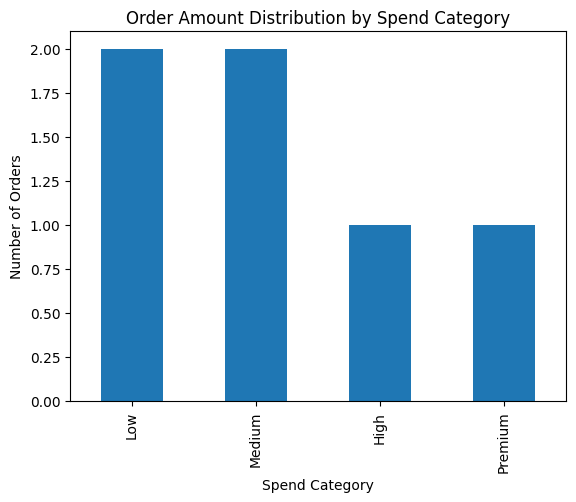

In [192]:
df["amount_bucket"].value_counts().sort_index().plot(kind="bar")

plt.title("Order Amount Distribution by Spend Category")
plt.xlabel("Spend Category")
plt.ylabel("Number of Orders")
plt.show()


In [193]:
Q1 = df["amount"].quantile(0.25)
Q3 = df["amount"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Q1, Q3, IQR, lower_bound, upper_bound

#Using the IQR method, we found no extreme outliers in order amounts, indicating that higher spends are part of normal customer behavior rather than anomalies


(np.float64(162.5),
 np.float64(287.5),
 np.float64(125.0),
 np.float64(-25.0),
 np.float64(475.0))

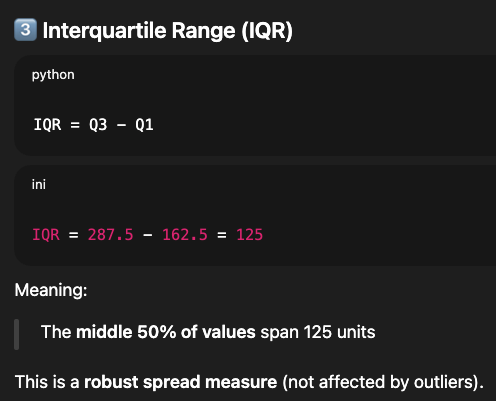
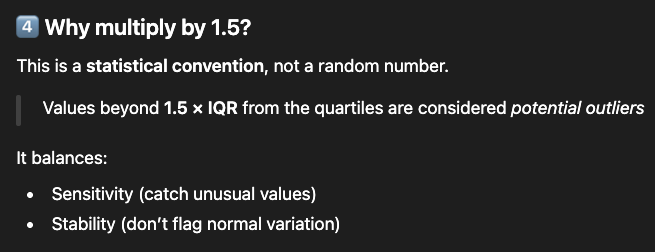

# The boxplot shows a right-skewed distribution with no statistical outliers; higher order values are part of normal customer behavior rather than anomalies.

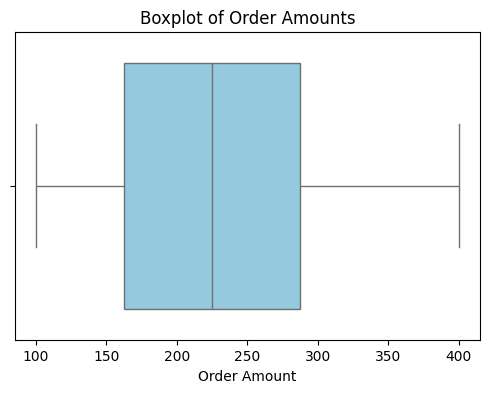

In [194]:
plt.figure(figsize=(6, 4))

sns.boxplot(
    x=df["amount"],
    color="skyblue"
)

plt.title("Boxplot of Order Amounts")
plt.xlabel("Order Amount")

plt.show()

# Order amounts show a mildly right-skewed distribution with no outliers. High-value purchases exist but fall within normal spending behavior, making median a more reliable measure than mean


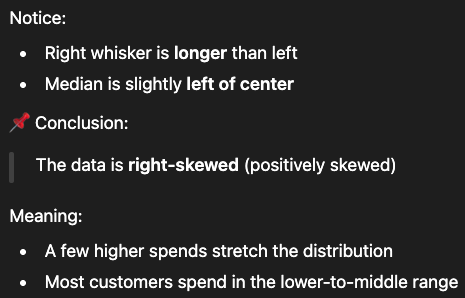

-----------------

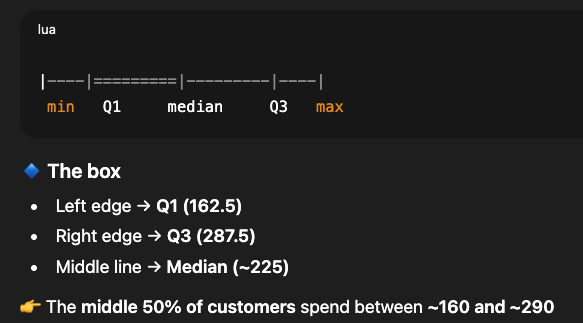

Order amounts show a mildly right-skewed distribution with no outliers. High-value purchases exist but fall within normal spending behavior, making median a more reliable measure than mean

# IQR (Interquartile Range) measures the spread of the middle 50% of the data.

 - Formula: IQR = Q3 − Q1

 - It shows how spread out typical values are, ignoring extreme highs/lows.

## Used to detect outliers:

- Lower bound = Q1 − 1.5 × IQR

- Upper bound = Q3 + 1.5 × IQR

### Why analysts use it:
- IQR is robust to outliers, unlike mean or standard deviation, so it gives a more reliable view of typical behavior.

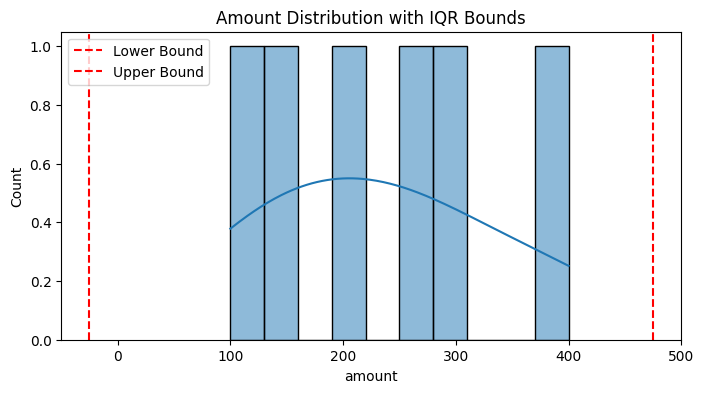

In [196]:
plt.figure(figsize=(8,4))
sns.histplot(df["amount"], bins=10, kde=True)
plt.axvline(lower_bound, color="red", linestyle="--", label="Lower Bound")
plt.axvline(upper_bound, color="red", linestyle="--", label="Upper Bound")
plt.legend()
plt.title("Amount Distribution with IQR Bounds")
plt.show()

# Day 2 – Exploratory Data Analysis (EDA) & Data Quality Checks

## Objective
Ensure the dataset is reliable and well-understood before any modeling by validating data quality, analyzing distributions, and checking for anomalies.

---

## 1. Data Quality Checks

### Missing Values
- Checked using `df.isnull().sum()`
- Result: No missing values across all columns
- Conclusion: Dataset is complete and does not require imputation

### Duplicate Records
- Checked using `df.duplicated().sum()`
- Result: No duplicate rows
- Conclusion: Aggregations and metrics are not inflated

---

## 2. Data Type Validation

### Country Column
- Initially stored as `object`
- Converted to `category` using `.astype("category")`
- Reason: Country represents a finite set of labels and is used for grouping

### Order Date Column
- Initially stored as `object` (string)
- Converted to `datetime` using `pd.to_datetime()`
- Reason: Temporal data requires datetime type for sorting, grouping, and date arithmetic

**Rule of Thumb**
- Use `.astype()` for safe, direct type conversions
- Use `pd.to_*()` functions when parsing or interpreting raw data

---

## 3. Distribution Analysis

### Order Amount Distribution
- Histogram used to observe overall shape
- Data is not symmetric
- Distribution is right-skewed (few high values stretch the right tail)

### Mean vs Median
- Mean is influenced by higher order values
- Median better represents typical customer spend
- Conclusion: Median is preferred for skewed distributions

---

## 4. Manual Binning (Business-Driven Segmentation)

Defined spend categories:
- Low: 0–150
- Medium: 150–250
- High: 250–350
- Premium: 350+

Used `pd.cut()` to convert numeric amounts into labeled categories.

Result:
- Low: 2 orders
- Medium: 2 orders
- High: 1 order
- Premium: 1 order

This approach is more interpretable than automatic histogram bins, especially for small datasets.

---

## 5. IQR (Interquartile Range) & Outlier Detection

### Definitions
- Q1 (25th percentile)
- Q3 (75th percentile)
- IQR = Q3 − Q1

### Outlier Bounds
- Lower bound = Q1 − 1.5 × IQR
- Upper bound = Q3 + 1.5 × IQR

### Observation
- No values fall outside the IQR bounds
- High-value orders are part of normal customer behavior

---

## 6. Boxplot Interpretation

- Box represents the middle 50% of order values (IQR)
- Median lies slightly left of center
- Right whisker is longer than left
- No outlier points observed

**Conclusion**
Order amounts show a mildly right-skewed distribution with no statistical outliers.  
Median is a more reliable measure than mean for typical customer spending.

---

## Key Takeaways
- Always validate data before analysis
- Distribution shape determines which statistics are trustworthy
- IQR is robust to outliers and preferred in skewed data
- Visualizations should support statistical reasoning, not replace it
